# Distances, Normes et Métriques
## Illustrations et Applications Pratiques

Ce notebook illustre les concepts de distances, normes et métriques avec des exemples numériques et des visualisations.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Espaces Métriques - Distance Euclidienne sur ℝ

### Exemple 1.1 : Distance sur la droite réelle

In [30]:
def distance_reelle(x, y):
    """Distance usuelle sur R : d(x,y) = |x - y|"""
# TODO: Calculer la valeur absolue de x - y
    return np.abs(x - y)
# Exemple avec des prix d'action
prix_action_A = 150.50
prix_action_B = 148.25
ecart = distance_reelle(prix_action_A, prix_action_B)
print(f"Prix action A : ${prix_action_A}")
print(f"Prix action B : ${prix_action_B}")
print(f"Écart : ${ecart}")

Prix action A : $150.5
Prix action B : $148.25
Écart : $2.25


### Exemple 1.2 : Distance Euclidienne en ℝⁿ

In [32]:
def distance_euclidienne(x, y):
    """Distance euclidienne : d₂(x,y) = √(Σ(xᵢ - yᵢ)²)"""
# TODO: Calculer la racine carrée de la somme des carrés des différences
    return np.sqrt(np.sum((x - y)**2))
# Exemple du document

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
dist = distance_euclidienne(x, y)
print(f"x = {x}")
print(f"y = {y}")
print(f"\nd₂(x,y) = {dist:.4f}")

x = [1 2 3]
y = [4 5 6]

d₂(x,y) = 5.1962


## 2. Les Normes Classiques sur ℝⁿ

Implémentation des trois normes principales : ℓ¹, ℓ², ℓ∞

In [34]:
def norme_l1(x):
    """Norme L1 (Manhattan) : ||x||₁ = Σ|xᵢ|"""
# TODO: Calculer la somme des valeurs absolues
    return np.sum(np.abs(x))

def norme_l2(x):
        """Norme L2 (Euclidienne) : ||x||₂ = √(Σxᵢ²)"""
# TODO: Calculer la racine carrée de la somme des carrés
        return np.sqrt(np.sum(x**2))

def norme_linf(x):
    """Norme L∞ (Maximum) : ||x||∞ = max|xᵢ|"""
# TODO: Calculer le maximum des valeurs absolues
    return np.max(np.abs(x))
# Exemple

x = np.array([3, -4, 2])
print(f"x = {x}")
print(f"||x||₁ = {norme_l1(x)}")
print(f"||x||₂ = {norme_l2(x):.4f}")
print(f"||x||∞ = {norme_linf(x)}")

x = [ 3 -4  2]
||x||₁ = 9
||x||₂ = 5.3852
||x||∞ = 4


### Vérification des inégalités entre normes

In [37]:
# Test sur plusieurs vecteurs aléatoires
np.random.seed(42)
n = 10
print("Vérification de : ||x||∞ ≤ ||x||₂ ≤ ||x||₁\n")
for i in range(5):
    x = np.random.randn(n)
# TODO: Calculer les trois normes
l1 = norme_l1(x)
l2 = norme_l2(x)
linf = norme_linf(x)
print(f"Test {i+1}: ||x||∞ = {linf:.2f} ≤ ||x||₂ = {l2:.2f} ≤ ||x||₁ = {l1:.2f}")
# TODO: Vérifier les inégalités    assert linf <= l2 <= l1, "Inégalité violée!"
assert linf <= l2 <= l1, "Inégalité violée!"
print("Toutes les inégalités sont satisfaites !")

Vérification de : ||x||∞ ≤ ||x||₂ ≤ ||x||₁

Test 5: ||x||∞ = 1.76 ≤ ||x||₂ = 2.82 ≤ ||x||₁ = 7.15
Toutes les inégalités sont satisfaites !


## 3. Visualisation des Boules pour Différentes Normes

Visualisation en 2D des boules unité pour les trois normes

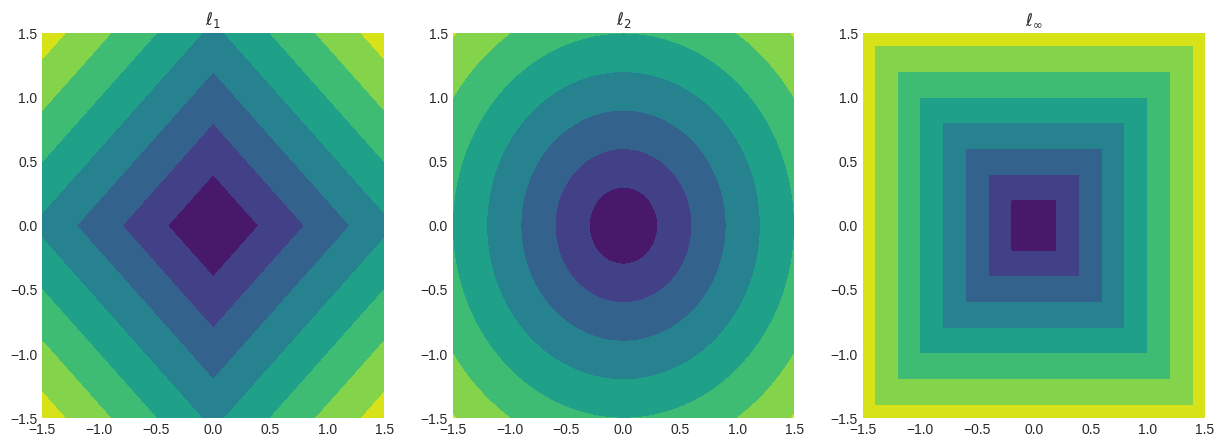

In [38]:
# Créer une grille de points
x = np.linspace(-1.5, 1.5, 300)
y = np.linspace(-1.5, 1.5, 300)
X, Y = np.meshgrid(x, y)
# Calculer les normes pour chaque point
# TODO: Calculer norm_l1 = |X| + |Y|
norm_l1 = np.abs(X) + np.abs(Y)

# TODO: Calculer
# norm_l2 = √(X² + Y²)
norm_l2 = np.sqrt(X**2 + Y**2)
# TODO: Calculer norm_l
# inf = max(|X|, |Y|)
norm_linf = np.maximum(np.abs(X), np.abs(Y))
# TODO: Créer la figure avec 3 sous-graphiques pour visualiser les boules unités
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].contourf(X, Y, norm_l1, cmap='viridis')
axs[0].set_title(r'$\ell_1$')
axs[1].contourf(X, Y, norm_l2, cmap='viridis')
axs[1].set_title(r'$\ell_2$')
axs[2].contourf(X, Y, norm_linf, cmap='viridis')
axs[2].set_title(r'$\ell_\infty$')

plt.show()

## 4. Applications Financières

### Application 4.1 : Mesure du Risque de Portefeuille

In [39]:
# Exemple du document
w_A = np.array([0.5, 0.5, 0, 0])
w_B = np.array([0.25, 0.25, 0.25, 0.25])
# TODO: Calculer les normes des portefeuilles
norm_A = np.sqrt(np.sum(w_A**2))
norm_B = np.sqrt(np.sum(w_B**2))

print("=== Analyse de Portefeuilles ===")
print(f"\nPortefeuille A (concentré sur 2 actifs):")
print(f"  Poids : {w_A}")
print(f"  ||w_A||₂ = {norm_A:.4f}")
print(f"\nPortefeuille B (diversifié sur 4 actifs):")
print(f"  Poids : {w_B}")
print(f"  ||w_B||₂ = {norm_B:.4f}")

=== Analyse de Portefeuilles ===

Portefeuille A (concentré sur 2 actifs):
  Poids : [0.5 0.5 0.  0. ]
  ||w_A||₂ = 0.7071

Portefeuille B (diversifié sur 4 actifs):
  Poids : [0.25 0.25 0.25 0.25]
  ||w_B||₂ = 0.5000


### Application 4.2 : Distance entre Stratégies de Trading

In [40]:
# Définir deux stratégies de trading
strategie_1 = np.array([100, 50, -30, 20, 0])
# Positions longues/courtes
strategie_2 = np.array([90, 55, -25, 25, 5])
strategie_3 = np.array([-100, 30, 50, -20, 40])
# Stratégie très différente# Calculer les distances
# TODO: Calculer dist_1_2 = ||strategie_1 - strategie_2||₂
dist_1_2 = np.sqrt(np.sum((strategie_1 - strategie_2)**2))
# TODO: Calculer dist_1_3 = ||strategie_1 - strategie_3||₂
dist_1_3 = np.sqrt(np.sum((strategie_1 - strategie_3)**2))
print("=== Comparaison de Stratégies ===")
print(f"Distance entre stratégie 1 et 2 : {dist_1_2:.2f}")
print(f"Distance entre stratégie 1 et 3 : {dist_1_3:.2f}")

=== Comparaison de Stratégies ===
Distance entre stratégie 1 et 2 : 14.14
Distance entre stratégie 1 et 3 : 223.61


### Application 4.3 : Erreurs de Prédiction (MAE et RMSE)

In [ ]:
# Générer des données de prédiction
np.random.seed(42)
n = 50
y_true = np.linspace(10, 50, n) + np.random.randn(n) * 2
y_pred = y_true + np.random.randn(n) * 3
# Calculer les erreurs
# TODO: Calculer erreur_l1 = ||y_true - y_pred||₁
erreur_l1 = ...
# TODO: Calculer erreur_l2 = ||y_true - y_pred||₂
erreur_l2 = ...# TODO: Calculer MAE et RMSE
MAE = ...
RMSE = ...

print("=== Erreurs de Prédiction ===")
print(f"MAE (Mean Absolute Error) : {MAE:.2f}")
print(f"RMSE (Root Mean Squared Error) : {RMSE:.2f}")

## 5. Équivalence des Normes en Dimension Finie

Démonstration numérique que toutes les normes sont équivalentes

In [ ]:
# Générer beaucoup de vecteurs aléatoires
np.random.seed(42)
n_dim = 10
n_vectors = 1000
vectors = np.random.randn(n_vectors, n_dim)
# Calculer les normes pour chaque vecteur
# TODO: Calculer les normes L1, L2, L∞ pour chaque vecteur
normes_l1 = ...
normes_l2 = ...
normes_linf = ...

# TODO: Créer des histogrammes pour visualiser les distributions

## 6. Comparaison des Normes sur un Exemple Concret

Visualisation de la manière dont différentes normes "mesurent" le même vecteur

In [ ]:
# Créer plusieurs vecteurs avec des caractéristiques différentes
vecteurs = {
    'Uniforme': np.ones(5),
    'Sparse': np.array([10, 0, 0, 0, 0]),
    'Décroissant': np.array([5, 4, 3, 2, 1]),
    'Oscillant': np.array([5, -4, 3, -2, 1]),}

# Calculer les normesresultats = []
for nom, vec in vecteurs.items():
    # TODO: Calculer les trois normes pour chaque vecteur
    l1 = ...
    l2 = ...
    linf = ...
    resultats.append([nom, l1, l2, linf])
# TODO: Afficher les résultats dans un tableau

## 7. Application : Régularisation en Machine Learning

Illustration de l'effet des différentes normes en régularisation

In [ ]:
# Simuler des poids de modèle avec régularisation L1 vs L2
np.random.seed(42)n_features = 20
# Poids sans régularisation (peuvent être grands)
w_no_reg = np.random.randn(n_features) * 2
# Poids avec régularisation L1 (tend vers la parcimonie - sparsity)
w_l1_reg = w_no_reg.copy()

# TODO: Appliquer un seuillage pour simuler L1 (mettre à 0 les petits poids)
# w_l1_reg[np.abs(w_l1_reg) < threshold] = 0

# Poids avec régularisation L2 (tend à réduire uniformément)
# TODO: Simuler L2 en multipliant par un facteur < 1

w_l2_reg = ...

print("=== Effet de la Régularisation ===")
print(f"Nombre de poids non-nuls (L1) : {np.sum(w_l1_reg != 0)}")
print(f"Norme L2 sans régularisation : {norme_l2(w_no_reg):.2f}")
print(f"Norme L2 avec régularisation : {norme_l2(w_l2_reg):.2f}")

## 8. Synthèse et Points Clés

### Résumé des concepts importants

In [ ]:
print("="*60)print("SYNTHÈSE : DISTANCES, NORMES ET MÉTRIQUES")
print("="*60)
# TODO: Résumer les concepts clés
# - Axiomes d'une métrique# - Normes L1, L2, L∞
# - Applications en finance et ML# - Régularisation L1 vs L2